*This jupyter notebook is part of Arizona State University's course CAS 503 (Fundamentals of Complex Systems Science: Collectives) and was written by Bryan Daniels.  It was last updated February 10, 2022.*

*The model used in this notebook appears in the following publication:*
* *Daniels, Bryan C., Jessica C. Flack, and David C. Krakauer. “Dual Coding Theory Explains Biphasic Collective Computation in Neural Decision-Making.” Frontiers in Neuroscience 11, 1–16 (2017). https://doi.org/10.3389/fnins.2017.00313*

# The Dynamics of Neural Decisions

We have now made it far enough in the course that we have the conceptual apparatus to begin with a specific model of collective behavior, ascertain its dynamical properties, and connect these to the collective's function.

In this notebook, we explore the dynamics of a simple model of neural decision-making that we saw in lecture:

$$ \frac{dx_i}{dt} = I - x_i + \sum_j W_{i,j} \tanh{x_j} + \xi . $$
Here, $x_i$ is the state of neuron $i$ and $\frac{dx_i}{dt}$ is its rate of change; $I$ represents sensory input into the neuron; the $-x_i$ term has the effect that the neuron $i$ returns to its inactive state 0 in the absence of other inputs; $W_{i,j}$ is the strength of the synaptic connection providing input into neuron $i$ from neuron $j$; $\tanh{x_j}$ represents the firing rate of neuron $j$ (which is a function of its own state $x_j$);  and $\xi$ represents random noise in both synaptic currents and the input signal.

## 1) Simulations and attractors

We'll use many of our usual packages, along with the `simpleNeuralModel` package that I wrote for simulating the above dynamics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18}) # increases font size on plots
import pandas as pd
from neural.simpleNeuralModel import simpleNeuralDynamics,allToAllNetworkAdjacency,findFixedPoints

Key to the collective dynamics of this model is the network structure that is represented by the matrix $W_{i,j}$.  For simplicity, we will just assume an all-to-all network—that is, each neuron receives input equally from all other neurons.  (We'll come back to this in the bonus question.)

Let's simulate 100 neurons in two different all-to-all networks, one with stronger connections and one with weaker connections:

In [2]:
# set up two networks on which dynamics will run
N = 100
strongInteractionNetworkW = 0.1*allToAllNetworkAdjacency(N)
weakInteractionNetworkW = 0.015*allToAllNetworkAdjacency(N)

The `simpleNeuralDynamics` function takes a connection matrix $W$ and simulates one run of the dynamics, by default running up to time 10 and setting input $I=0$:

In [3]:
simData = simpleNeuralDynamics(strongInteractionNetworkW)

In [4]:
simData

,Neuron 0,Neuron 1,Neuron 2,Neuron 3,Neuron 4,Neuron 5,Neuron 6,Neuron 7,Neuron 8,Neuron 9,...,Neuron 90,Neuron 91,Neuron 92,Neuron 93,Neuron 94,Neuron 95,Neuron 96,Neuron 97,Neuron 98,Neuron 99
Time,,,,,,,,,,,,,,,,,,,,,
0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.001,0.021489,-0.025224,-0.045973,0.000819,-0.008329,0.014620,0.017490,-0.016194,0.026923,-0.044290,...,-0.002317,-0.010040,-0.033315,0.028147,-0.032094,-0.000552,0.042327,0.050796,-0.003454,0.004126
0.002,0.049024,-0.013981,-0.022010,-0.029032,-0.010923,0.002031,0.014056,0.014658,0.035427,-0.030037,...,-0.017038,0.033145,-0.066546,-0.036863,-0.064891,-0.009022,0.052910,0.013285,0.014381,0.033983
0.003,0.031857,0.012889,-0.090744,-0.043421,-0.038634,0.041024,-0.015103,-0.013956,0.013404,-0.034320,...,-0.023917,0.007324,-0.061847,-0.049757,-0.058388,-0.024070,0.064161,0.006349,-0.007709,0.108193
0.004,0.067595,0.050582,-0.137076,0.005064,0.018314,0.021396,-0.022981,0.023347,0.043504,-0.118379,...,-0.014695,-0.010516,-0.021975,-0.063220,-0.096162,-0.025892,0.067602,-0.020495,-0.036940,0.140471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.996,-10.551814,-9.005679,-8.199665,-10.137733,-9.669668,-10.004566,-9.951095,-8.781225,-9.128863,-9.854825,...,-10.687971,-10.606414,-9.831590,-10.561698,-9.661928,-9.998496,-9.558425,-9.310378,-10.229604,-10.237488
9.997,-10.590124,-8.977731,-8.180015,-10.083115,-9.645850,-10.023504,-9.935163,-8.836194,-9.131768,-9.865159,...,-10.689100,-10.585571,-9.876819,-10.581101,-9.695404,-9.998941,-9.616291,-9.329955,-10.231182,-10.214609
9.998,-10.541221,-8.971077,-8.140030,-10.070732,-9.657090,-10.028453,-9.975561,-8.881134,-9.089168,-9.852596,...,-10.686891,-10.580211,-9.874840,-10.552803,-9.728993,-9.980362,-9.603534,-9.356758,-10.239025,-10.170883


To visualize this, we can plot the trajectories of the states of individual neurons:

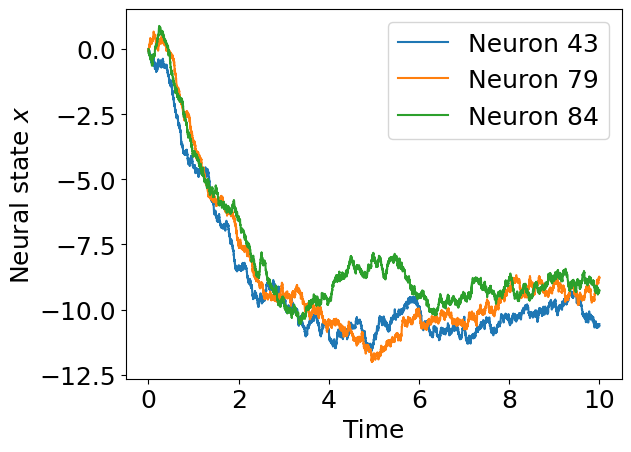

In [5]:
simData['Neuron 43'].plot()
simData['Neuron 79'].plot()
simData['Neuron 84'].plot()
plt.ylabel('Neural state $x$')
plt.legend()

Now rerun the simulation 5 or 10 times and replot the dynamics.

❓**What appear to be the possible behaviors of the system?  Does it seem to settle into distinct attractor states?  If so, how many?**

✳️ **Answer:** 

It is sometimes possible to find a system's fixed points without directly simulating it.  Recall from the module on attractors that by asking when the system dynamics are stationary (solving $\frac{dx}{dt} = 0$), we find the system's fixed points.

In this case, if we neglect the noise term $\xi$ (see the equation at the start of the notebook), we can ask the computer to numerically solve for the neural fixed point states $x^*$ for which $\frac{dx^*}{dt} = 0$.  I wrote a simple function `findFixedPoints` to do this for us, given the connection matrix $W$:

In [6]:
fixedPoints = findFixedPoints(strongInteractionNetworkW)

The function finds three fixed points:  

In [7]:
fixedPoints

,Neuron 0,Neuron 1,Neuron 2,Neuron 3,Neuron 4,Neuron 5,Neuron 6,Neuron 7,Neuron 8,Neuron 9,...,Neuron 90,Neuron 91,Neuron 92,Neuron 93,Neuron 94,Neuron 95,Neuron 96,Neuron 97,Neuron 98,Neuron 99
0,-9.9,-9.9,-9.9,-9.9,-9.9,-9.9,-9.9,-9.9,-9.9,-9.9,...,-9.9,-9.9,-9.9,-9.9,-9.9,-9.9,-9.9,-9.9,-9.9,-9.9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.9,9.9,9.9,9.9,9.9,9.9,9.9,9.9,9.9,9.9,...,9.9,9.9,9.9,9.9,9.9,9.9,9.9,9.9,9.9,9.9


Note that all neurons have the same value in each of the three fixed point states.  This is perhaps unsurprising because all neurons are equivalent in our current setup.

❓**Add horizontal lines to the plot above corresponding to these (no-noise) fixed points.**  *Hint: You can use the function `plt.hlines`.  For example, `plt.hlines(fixedPoints['Neuron 43'],xmin=0,xmax=10,linestyle='--')`)*

In [8]:
# ✳️ Answer:

❓**Based on the model dynamics you observed above, which of the fixed points are stable attractors and which are unstable?**

✳️ **Answer:** 

❓**How does this attractor structure allow the system of neurons to make a binary decision at a collective level?**

✳️ **Answer:**

## 2) Decision-making functionality

Now let's look at how well our simulated neural system works in making the *correct* decision when given a weak sensory input.

First, we'll run the simulation with a small input $I = 0.075$ applied to each neuron, then with the opposite input $I = -0.075$.

In [9]:
inputConst = 0.075

simDataPositiveInput = simpleNeuralDynamics(strongInteractionNetworkW, inputConst = inputConst)
simDataNegativeInput = simpleNeuralDynamics(strongInteractionNetworkW, inputConst = -inputConst)

Now plot the dynamics of one of the neurons in each case:

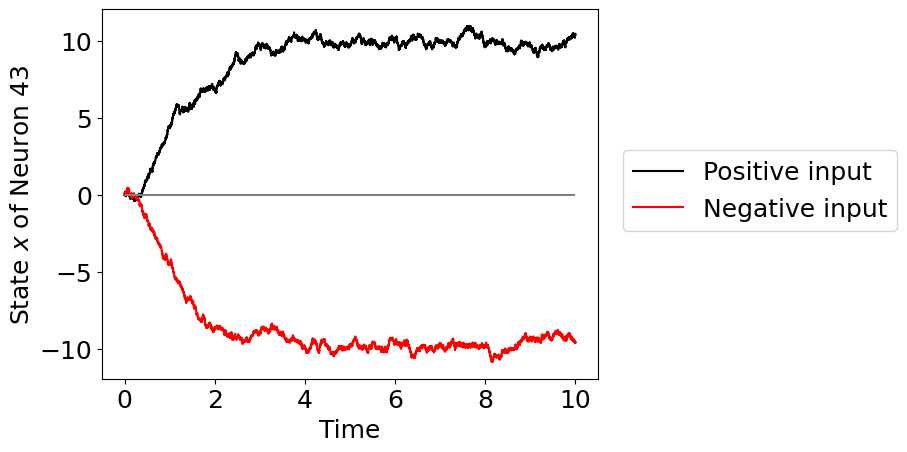

In [10]:
simDataPositiveInput['Neuron 43'].plot(color='black')
simDataNegativeInput['Neuron 43'].plot(color='red')

plt.ylabel('State $x$ of Neuron 43')
plt.legend(['Positive input','Negative input'],loc=(1.05,0.4))
plt.hlines(0,xmin=0,xmax=10,color='gray') # add a horizontal line at 0

Run this a few times to get a feeling for the typical behavior.

❓**What final states would correspond to "correct" behavior here?**

✳️ **Answer:** 

Let's do multiple runs to get a better sense of the range of behaviors.  Here I define a function that just runs the simulation 10 times:

In [11]:
def simpleNeuralDynamics_multiple(weightMatrix,numRuns=10,**kwargs):
    """
    Run the simpleNeuralDynamics simulation numRuns times and return a list of data from each run.
    """
    simDataList = []
    for i in range(numRuns):
        simData = simpleNeuralDynamics(weightMatrix,**kwargs)
        simDataList.append(simData)
    return simDataList

Running this now takes a bit longer:

In [12]:
simDataListPositive = simpleNeuralDynamics_multiple(strongInteractionNetworkW, inputConst = inputConst)
simDataListNegative = simpleNeuralDynamics_multiple(strongInteractionNetworkW, inputConst = -inputConst)

And we get a nice plot similar to the ones we saw in lecture:

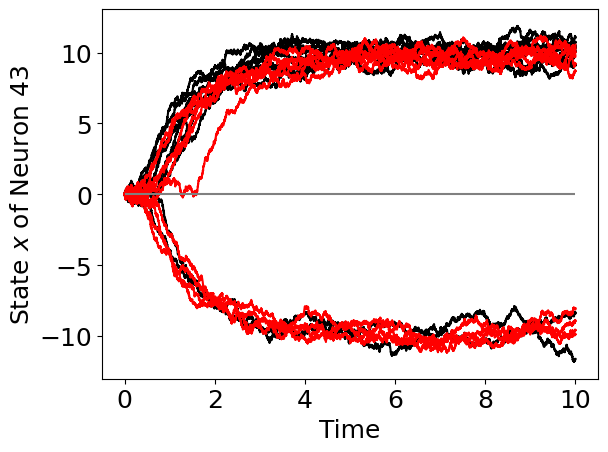

In [13]:
for simDataPositive in simDataListPositive:
    simDataPositive['Neuron 43'].plot(color='black')
for simDataNegative in simDataListNegative:
    simDataNegative['Neuron 43'].plot(color='red')
    
plt.ylabel('State $x$ of Neuron 43')
plt.hlines(0,xmin=0,xmax=10,color='gray'); # add a horizontal line at 0

❓**Describe how well the system is performing.  About how often do the neurons produce the correct decision?**

✳️ **Answer:** 

Now let's try to improve the accuracy by tweaking the interactions between neurons.  Specifically, we'll try using *weaker* interactions, using the `weakInteractionNetworkW` we defined at the beginning.

❓**Remake the previous plot using the same positive and negative inputs, but with neurons interacting according to `weakInteractionNetworkW`.**

In [14]:
# ✳️ Answer:

Hmm, this doesn't look much better!  But recall that this plot shows only the state of a single neuron.  What if we look at the aggregate, collective level?

❓**Instead of the state of a single neuron, modify the above plot to show the *average state over all neurons* for each simulation run.** *Hint: To get the right average over neurons for the pandas DataFrame `simDataPositive`, use `simDataPositive.mean(axis=1)`.  Remember to correctly label your axes!  The correct plot should show the average state over all neurons as a function of time.*

In [15]:
# ✳️ Answer:

❓**How well does the *collective* neural system perform with weak interactions?  Is the system successfully making use of the "noise reduction" strategy from Module 3?**

✳️ **Answer:**

❓**In words, how do the above results correspond to a speed-accuracy tradeoff?** *Hint: Compare the speed with which the system approaches the attractor decision states in the case of strong and weak interactions.  Then consider the decision accuracy in the two cases.  Do you have an intuition for why the speed of the decision affects its accuracy?*

✳️ **Answer:**

**Bonus questions (for nothing but bragging rights):**

1)  We found above that the strength and number of interactions is critical to the speed-accuracy tradeoff, because more and stronger interactions lead to signals being quickly amplified by the dynamics. ⚛️ **Based on the previous module, what single coarse-grained number would you expect to be a good measure of this amplification in an arbitrary network (that is, a measure of how quickly perturbations spread through the system)?**

2)  The all-to-all connection case is in fact simple enough that it is possible to write down a single one-dimensional equation that produces the three zero-noise fixed points. ⚛️ **Find this equation and make a plot that shows the location of the three fixed points. Check that it matches with what we found numerically above.**

✴️ **Answers:**